In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This prevents kernel shut down due to xgboost conflict
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In [2]:
img = ImageDataGenerator(validation_split=.20)

In [3]:
data_path = '../Data/sample_Signature/sample_Signature/'


In [4]:
train = img.flow_from_directory(data_path, color_mode='grayscale', subset='training', batch_size=240)
test = img.flow_from_directory(data_path, color_mode='grayscale', subset='validation', batch_size=60)


Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [5]:
train_images, train_labels = next(train)
test_images, test_labels = next(test)

In [6]:
len(train_images)

240

In [7]:
len(test_images)

60

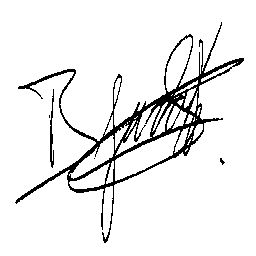

In [8]:
array_to_img(train_images[0])

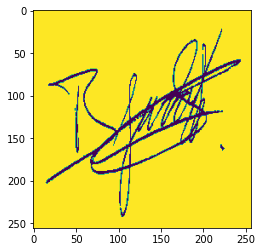

In [9]:
display(plt.imshow(train_images[0]))

In [10]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(240, 256, 256, 1)
(240, 2)
(60, 256, 256, 1)
(60, 2)


In [11]:
train_images

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[249.],
         [249.],
         [249.],
         ...,
         [249.],
         [249.],
         [249.]],

        [[249.],
         [249.],
         [249.],
         ...,
         [249.],
         [249.],
         [249.]],

        [[249.],
         [249.],
      

In [12]:
train_img_unrow = train_images.reshape(240, -1).T

In [13]:
test_images

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
      

In [14]:
# Define appropriate m 
m = 60
test_img_unrow = test_images.reshape(m, -1).T

In [15]:
np.shape(train_img_unrow)

(65536, 240)

In [16]:
train_labels

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [17]:
train.class_indices 

{'forged': 0, 'genuine': 1}

In [18]:
train_labels_final = train_labels.T[[1]]
test_labels_final = test_labels.T[[1]]

In [19]:
np.shape(train_labels_final) 

(1, 240)

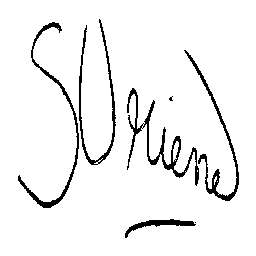

In [20]:
array_to_img(train_images[30])

In [21]:
train_labels_final[:,30]

array([0.], dtype=float32)

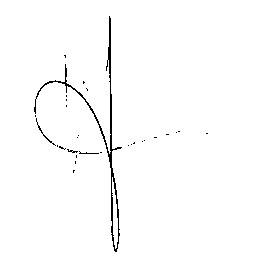

In [22]:
array_to_img(train_images[75])

In [23]:
train_labels_final[:,75]

array([1.], dtype=float32)

In [24]:
train.class_indices 

{'forged': 0, 'genuine': 1}

In [25]:
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

In [26]:
b = 0

In [27]:
def init_w(n):
    w = np.zeros((n, 1))
    return w

In [28]:
w = init_w(256*256)

In [29]:
# Define the propagation function
def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost

In [30]:
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

In [31]:
print(dw)

print(db)

print(cost)

[[ 3.26797366e-05]
 [ 1.63398683e-05]
 [-1.63398683e-05]
 ...
 [ 8.98692757e-05]
 [ 6.53594732e-05]
 [ 1.79738551e-04]]
0.0
0.6931471805599453


In [32]:
# Complete the function below using your propagation function to define dw, db and cost 
# Then use the formula above to update w and b in the optimization function 
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [33]:
# Run this block of code as is
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.683467
Cost after iteration 100: 0.674212
Cost after iteration 150: 0.665348


In [34]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

In [35]:
# Run this block of code as is
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

array([[1., 1., 0., 0.]])

In [36]:
# Review this code carefully
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [42]:
# Run the model!
# ⏰ Expect your code to take several minutes to run
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

/Users/zachrauch/opt/anaconda3/envs/tf-test/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/zachrauch/opt/anaconda3/envs/tf-test/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Users/zachrauch/opt/anaconda3/envs/tf-test/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


KeyboardInterrupt: 